In [1]:
# Assignment 1-2
# Xiaopeng Pan (1129446)
# Jan 26, 2021
# Dataset: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [2]:
import numpy as np
import time
import random
import math
import matplotlib.pyplot as plt

In [3]:
# load the data
data_path = r'/content/drive/My Drive/Colab Notebooks/data/dl_a1_dataset_r/auto-mpg.data'
f = open(data_path,"r")   
lines = f.readlines()        
f.close()

num_line=0
for line in lines:
  line_split = line.split()
  if "?" in line_split:
    continue
  if num_line==0:  
    data = np.zeros((5,1))    # store the features of displacement,horsepower,weight,acceleration, mpg (miles per gallon), mpg is the last row and will be "y"
    data[0,0] = float(line_split[2])  # displacement
    data[1,0] = float(line_split[3])  # horsepower
    data[2,0] = float(line_split[4])  # weight
    data[3,0] = float(line_split[5])  # acceleration
    data[4,0] = float(line_split[0])  # mpg
  else:
    tmp = np.zeros((5,1))    
    tmp[0,0] = float(line_split[2])  # displacement
    tmp[1,0] = float(line_split[3])  # horsepower
    tmp[2,0] = float(line_split[4])  # weight
    tmp[3,0] = float(line_split[5])  # acceleration
    tmp[4,0] = float(line_split[0])  # mpg
    data = np.hstack((data,tmp))
  num_line = num_line + 1

print("The first 5 records are:")
print(data[:,0:5])

# save the extracted data
np.save("/content/drive/My Drive/Colab Notebooks/data/dl_a1_dataset_r/dl_a1_data_r.npy",data)
print("/content/drive/My Drive/Colab Notebooks/data/dl_a1_dataset_r/dl_a1_data_r.npy.npy saved.")

The first 5 records are:
[[ 307.   350.   318.   304.   302. ]
 [ 130.   165.   150.   150.   140. ]
 [3504.  3693.  3436.  3433.  3449. ]
 [  12.    11.5   11.    12.    10.5]
 [  18.    15.    18.    16.    17. ]]
/content/drive/My Drive/Colab Notebooks/data/dl_a1_dataset_r/dl_a1_data_r.npy.npy saved.


In [4]:
# method to shuffle a dataset
def shuffle_data(data_in):
  num_row = data_in.shape[0] # number of rows
  num_col = data_in.shape[1] # number of columns
  data_in_shuffled = np.zeros((num_row,num_col))
  index_col = list(range(num_col))
  # shuffle the column index
  random.shuffle(index_col)
  # generate shuffled data
  for _ in range(num_col):
    data_in_shuffled[:,_:_+1]=data_in[:,index_col[_]:index_col[_]+1]
  return data_in_shuffled

# the sigmoid method, x is the result of w'*x
def sigmoid(x):
  return 1.0 / (1+np.exp(-x))

# the derivative of sigmoid,  x is the result of w'*x
def d_sigmoid(x):
  return np.exp(-x) / ((1+np.exp(-x))**2)

In [5]:
# shuffle the extracted data
data = shuffle_data(data)

print("After shuffle, the first 5 records are:")
print(data[:,0:5])

# normalize the data:
mean = data.mean(axis=1) # axis=1, left to right
mean = mean.reshape(mean.shape[0],-1)
data_normalized = data - mean
data_normalized_abs = np.abs(data_normalized)
max = data_normalized_abs.max(axis=1)
max = max.reshape(max.shape[0],-1)
data_normalized = data_normalized / max

# save the mean and max for output to restore the values
mean_o = mean.item((-1,0))
max_o = max.item((-1,0))

print("After normalization, the first 5 records are:")
print(data_normalized[:,0:5])

After shuffle, the first 5 records are:
[[ 135.    97.    97.   200.    98. ]
 [  84.    78.    92.    85.    68. ]
 [2385.  2188.  2288.  2990.  2135. ]
 [  12.9   15.8   17.    18.2   16.6]
 [  30.    34.3   28.    19.8   29.5]]
After normalization, the first 5 records are:
[[-0.22799203 -0.37381609 -0.37381609  0.02144385 -0.36997861]
 [-0.16306292 -0.21086002 -0.09933344 -0.15509673 -0.29052187]
 [-0.27403804 -0.36513985 -0.31889527  0.00574164 -0.38964947]
 [-0.28528131  0.0279385   0.1575467   0.2871549   0.11434397]
 [ 0.28306377  0.46877617  0.19668591 -0.15746331  0.26146931]]


In [6]:
# split train and test sets
num_tr=int(0.9*data_normalized.shape[1])       # assign 90% of the data to the train set
num_te=data_normalized.shape[1]-num_tr

data_train = data_normalized[:,:num_tr]                # data set for training
data_test = data_normalized[:,num_tr:]

print("The first 5 records of the train set:")
print(data_train[:,0:5])
print("The first 5 records of the test set:")
print(data_test[:,0:5])

The first 5 records of the train set:
[[-0.22799203 -0.37381609 -0.37381609  0.02144385 -0.36997861]
 [-0.16306292 -0.21086002 -0.09933344 -0.15509673 -0.29052187]
 [-0.27403804 -0.36513985 -0.31889527  0.00574164 -0.38964947]
 [-0.28528131  0.0279385   0.1575467   0.2871549   0.11434397]
 [ 0.28306377  0.46877617  0.19668591 -0.15746331  0.26146931]]
The first 5 records of the test set:
[[-0.28555416 -0.28171668 -0.31625396  0.59706511  0.14424305]
 [-0.13119818  0.04405788 -0.13119818  0.48219802 -0.03560397]
 [-0.00951907 -0.14686546 -0.26941358  0.56946301  0.14355047]
 [ 0.1575467  -0.1664738   0.26555354 -0.38248746 -0.00446355]
 [-0.01925874  0.02393019  0.45581949 -0.4079591  -0.23520338]]


Streaming output truncated to the last 5000 lines.
Epoch # 5006 rmse: 0.20333106521120023
Epoch # 5007 rmse: 0.20332376211799222
Epoch # 5008 rmse: 0.2033164586595851
Epoch # 5009 rmse: 0.2033091548849144
Epoch # 5010 rmse: 0.2033018508429988
Epoch # 5011 rmse: 0.20329454658293508
Epoch # 5012 rmse: 0.20328724215389452
Epoch # 5013 rmse: 0.20327993760511714
Epoch # 5014 rmse: 0.20327263298590878
Epoch # 5015 rmse: 0.2032653283456354
Epoch # 5016 rmse: 0.20325802373371865
Epoch # 5017 rmse: 0.20325071919963206
Epoch # 5018 rmse: 0.20324341479289523
Epoch # 5019 rmse: 0.20323611056307064
Epoch # 5020 rmse: 0.20322880655975759
Epoch # 5021 rmse: 0.2032215028325885
Epoch # 5022 rmse: 0.20321419943122349
Epoch # 5023 rmse: 0.20320689640534642
Epoch # 5024 rmse: 0.2031995938046598
Epoch # 5025 rmse: 0.20319229167887984
Epoch # 5026 rmse: 0.20318499007773164
Epoch # 5027 rmse: 0.2031776890509451
Epoch # 5028 rmse: 0.20317038864824927
Epoch # 5029 rmse: 0.20316308891936774
Epoch # 5030 rmse: 0

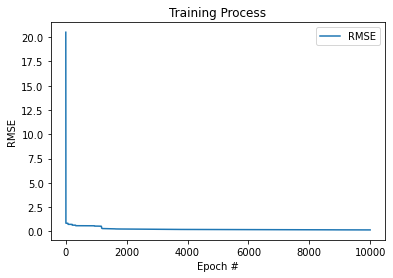

In [7]:
# method to train the MLP model for regression problem
def mlp_train(data_train):
  # initialization of the MLP model
  num_in = 4
  num_hd_1 = 20
  num_hd_2 = 20
  num_hd_3 = 20
  num_out = 1
  num_epoch = 10000
  mse_ = 1
  mse_thres = 1e-3
  epoch = 1
  alpha = 1
  eta1 = 0.05
  eta2 = 0.05
  eta3 = 0.05
  eta4 = 0.05

  # initialize weights  
  w_1_1 = np.random.rand(num_hd_1,num_in+1)     # the weights between input layer and the 1st hidden layer, size: num_hd_1 x (num_in + 1)
  dw_0_1 = np.zeros((num_hd_1,num_in+1))        # delta weights for w_1_1
  w_1_2 = np.random.rand(num_hd_2,num_hd_1+1)   # the weights between the 1st hidden layer and the 2nd hidden layer, size: num_hd_2 x (num_hd_1 + 1)
  dw_0_2 = np.zeros((num_hd_2,num_hd_1+1))      # delta weights for w_1_2
  w_1_3 = np.random.rand(num_hd_3,num_hd_2+1)   # the weights between the 2nd hidden layer and the 3rd hidden layer, size: num_hd_3 x (num_hd_2 + 1)
  dw_0_3 = np.zeros((num_hd_3,num_hd_2+1))      # delta weights for w_1_3
  w_1_4 = np.random.rand(num_out,num_hd_3+1)    # the weights between the 3rd hidden layer and the output layer, size: num_out x (num_hd_3 + 1)
  dw_0_4 = np.zeros((num_out,num_hd_3+1))       # delta weights for w_1_4       

  # main loop for training
  time_st = time.time()

  print("Training in Process:")
  print("-"*80)
  rmse = []
  while mse_ > mse_thres and epoch <= num_epoch:
    print("Epoch # {}".format(epoch),end="")

    # shuffle the training data for every epoch
    # data_train = shuffle_data(data_train)

    # use all the data for training in this epoch
    err = []
    for i in range(data_train.shape[1]):
      # forward computation
      x = np.vstack([data_train[0:4,i].reshape(data_train.shape[0]-1,-1),np.array([1])])  # fetch input data
      d = data_train[4,i]   # fetch desired response
      hd_1 = np.vstack([sigmoid(np.dot(w_1_1,x)),np.array([[1]])])    # calculate the 1st hidden layer output
      hd_2 = np.vstack([sigmoid(np.dot(w_1_2,hd_1)),np.array([[1]])]) # calculate the 2nd hidden layer output
      hd_3 = np.vstack([sigmoid(np.dot(w_1_3,hd_2)),np.array([[1]])]) # calculate the 3rd hidden layer output
      o = np.dot(w_1_4,hd_3)                                          # calculate output layer output
      e = d - o             # calculate error
      err.append(e)
      
      # backward computation
      delta_out = e
      delta_hd_3 = d_sigmoid(np.dot(w_1_3,hd_2))*(np.dot(w_1_4[:,:-1].T,delta_out))
      delta_hd_2 = d_sigmoid(np.dot(w_1_2,hd_1))*(np.dot(w_1_3[:,:-1].T,delta_hd_3))
      delta_hd_1 = d_sigmoid(np.dot(w_1_1,x))*(np.dot(w_1_2[:,:-1].T,delta_hd_2))
      
      dw_1_1 = eta1*np.dot(delta_hd_1,x.T)
      dw_1_2 = eta2*np.dot(delta_hd_2,hd_1.T)
      dw_1_3 = eta3*np.dot(delta_hd_3,hd_2.T)
      dw_1_4 = eta4*np.dot(delta_out,hd_3.T)

      # weights update
      w_2_1 = w_1_1 + alpha*dw_0_1 + dw_1_1
      w_2_2 = w_1_2 + alpha*dw_0_2 + dw_1_2
      w_2_3 = w_1_3 + alpha*dw_0_3 + dw_1_3
      w_2_4 = w_1_4 + alpha*dw_0_4 + dw_1_4

      # move weights one-step
      dw_0_1 = dw_1_1
      dw_0_2 = dw_1_2
      dw_0_3 = dw_1_3
      dw_0_4 = dw_1_4
      w_1_1 = w_2_1
      w_1_2 = w_2_2
      w_1_3 = w_2_3
      w_1_4 = w_2_4
    
    sum_err = 0
    for e in err:
      sum_err += np.sum(np.power(e,2))
    mse_ = sum_err / len(err)
    rmse.append(mse_**0.5)

    print(" rmse: {}".format(rmse[-1]))
    epoch += 1

  print("-"*80)
  print("Points trained         : {}".format(i+1))
  print("Epochs conducted       : {}".format(epoch-1))
  print("Final RMSE             : {}".format(rmse[-1]))
  print("Training time (sec)    : {}".format(time.time()-time_st))

  # plot the training process
  epoch_ = [i for i in range(1,epoch)]
  plt.plot(epoch_,rmse,label='RMSE')
  plt.title('Training Process')
  plt.xlabel('Epoch #')
  plt.ylabel('RMSE')
  plt.legend()
  plt.show()
  
  return w_1_1, w_1_2, w_1_3, w_1_4

# train the MLP model for regression and return parameters
w_1_1, w_1_2, w_1_3, w_1_4 = mlp_train(data_train)

Testing in Process:
--------------------------------------------------------------------------------
True: -0.01925873694416283 	Prediction:0.12265417319510158
True: 0.02393019258736949 	Prediction:0.0916513706108655
True: 0.4558194879026927 	Prediction:0.16375929994969907
True: -0.4079591027279537 	Prediction:-0.31678966766815275
True: -0.23520338460182444 	Prediction:-0.08570193058759751
True: 0.06711912211890181 	Prediction:-0.08874637637616786
True: 0.0196112996342162 	Prediction:0.27493749059689526
True: 0.5465162399189106 	Prediction:0.5914606140950749
True: -0.4079591027279537 	Prediction:-0.31423186673896036
True: 0.40399277246485377 	Prediction:0.5722194538063929
True: 0.5983429553567492 	Prediction:0.4270044677471348
True: -0.12291216781984034 	Prediction:-0.08589274215191037
True: -0.4079591027279537 	Prediction:-0.342747994401122
True: -0.07972323828830802 	Prediction:-0.0760229679045185
True: 0.46445727380899926 	Prediction:0.36126864879695253
True: -0.34317570843065526 	P

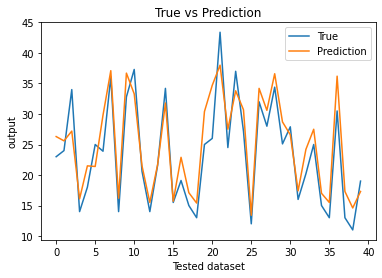

In [8]:
# method to test the MLP model for regression problem
def mlp_test(data_test,mean_o,max_o,w_1_1,w_1_2,w_1_3,w_1_4):

  time_st = time.time()

  print("Testing in Process:")
  print("-"*80)
  
  # forward computation
  pre = []
  err = []
  for i in range(data_test.shape[1]):
    x = np.vstack([data_test[0:4,i].reshape(data_test.shape[0]-1,-1),np.array([1])])  # fetch input data
    d = data_test[4,i]   # fetch desired response
    hd_1 = np.vstack([sigmoid(np.dot(w_1_1,x)),np.array([[1]])])    # calculate the 1st hidden layer output
    hd_2 = np.vstack([sigmoid(np.dot(w_1_2,hd_1)),np.array([[1]])]) # calculate the 2nd hidden layer output
    hd_3 = np.vstack([sigmoid(np.dot(w_1_3,hd_2)),np.array([[1]])]) # calculate the 3rd hidden layer output
    o = np.dot(w_1_4,hd_3)                                          # calculate output layer output
    print("True: {} \tPrediction:{}".format(d,o.item((0,0))))
    pre.append(o.item((0,0)))
    e = d - o             # calculate error
    err.append(e)
  
  sum_err = 0
  for e in err:
    sum_err += np.sum(np.power(e,2))
  mse = sum_err/ len(err)
  rmse = mse**2

  true = data_test[4,:].tolist()
  true = [i * max_o + mean_o for i in true]
  pre = [i * max_o + mean_o for i in pre]
  pre = [round(i,1) for i in pre]

  print("-"*80)
  print("Points tested          : {}".format(i+1))
  print("True                   : {}".format(true))
  print("Prediction             : {}".format(pre))
  print("RMSE                   : {}".format(rmse))
  print("Training time (sec)    : {}".format(time.time()-time_st))

  # plot the results
  plt.plot(true,label='True')
  plt.plot(pre,label='Prediction')
  plt.title('True vs Prediction')
  plt.xlabel('Tested dataset')
  plt.ylabel('output')
  plt.legend()
  plt.show()

mlp_test(data_test,mean_o,max_o,w_1_1, w_1_2, w_1_3, w_1_4)